In [1]:
# Written by Anna C Helfeld C
# Fall 2018-Winter 2019

# This code uses my solutions written in Octave/Matlab as a guide
# Machine Learning (Andrew Ng class on Coursera)
# Homework 7, part I: K-means clustering

In [2]:
# Import libraries
from pandas import *
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import math as mth

In [3]:
# Load data
import h5py 
dataset = sio.loadmat('ex7data2.mat')

In [4]:
# Put X and y data into arrays
Xdata = dataset['X']

In [5]:
# Set number of centroids
K = 3

In [6]:
# Select K random centroids
centroids_init = Xdata[np.random.randint(Xdata.shape[0], size=K), :]
centroids = centroids_init

In [7]:
# Define closest centroids function
def closecentr(X, centr, K):
    dist=np.zeros((X.shape[0],K))
    idx=np.zeros((X.shape[0],1))
    for i in range(0,X.shape[0]):
        for k in range(0,K):
            dist[i,k] = np.sum(np.power(X[i,:]-centr[k,:],2))
    idx = np.argmin(dist, axis=1)
    return idx

In [8]:
# Re-define centroids based on values assigned to it
def setcentr(X, idx, K):
    m = X.shape[0]
    n = X.shape[1]
    boolean=np.zeros((m,1))
    centrs=np.zeros((K,n))
    for i in range(0,K):
        boolean=idx==i # TRUE if points are assigned to K, FALSE if not
        centrs[i,:]=np.matmul(np.transpose(boolean),X)/sum(boolean); #1xm times mxn => 1byn
    return centrs

In [9]:
# Set number of iterations
numit = 20

In [10]:
# Run k-means clustering
for i in range(0,numit):
    idx = closecentr(Xdata, centroids, K)
    centroids = setcentr(Xdata, idx, K)

In [11]:
centroids

array([[1.95399466, 5.02557006],
       [6.03366736, 3.00052511],
       [3.04367119, 1.01541041]])

Text(0.5, 1.0, 'Centroids for K-means clustering')

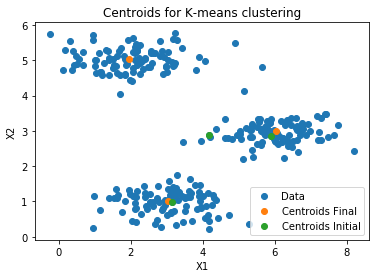

In [12]:
# Plot X with centroids 
X_plot = plt.scatter(Xdata[:,0], Xdata[:,1])
centrs_plot = plt.scatter(centroids[:,0], centroids[:,1])
centrsIn_plot = plt.scatter(centroids_init[:,0], centroids_init[:,1])
plt.legend([X_plot, centrs_plot, centrsIn_plot], ['Data', 'Centroids Final', 'Centroids Initial'])


plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Centroids for K-means clustering')